In [5]:
from scipy.io import loadmat
import numpy as np

In [6]:
# Load the .mat file
data = loadmat("E:\FYP\Finalise Fyp\EEg-based-Emotion-Recognition\data_preprocessed_matlab\s01.mat")  # Change filename as needed

# Check keys to see what variables are inside
print("Keys in .mat file:", data.keys())


<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\hamza\AppData\Local\Temp\ipykernel_18888\4182057700.py:2: SyntaxWarning: invalid escape sequence '\F'
  data = loadmat("E:\FYP\Finalise Fyp\EEg-based-Emotion-Recognition\data_preprocessed_matlab\s01.mat")  # Change filename as needed


Keys in .mat file: dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])


In [7]:
eeg_data = data['data']  # Adjust key based on your file structure
labels = data['labels']  # Adjust key accordingly

print("EEG Data Shape:", eeg_data.shape)  # Expected: (32, 40, 40, 8064)
print("Labels Shape:", labels.shape)      # Expected: (32, 40, 4)


EEG Data Shape: (40, 40, 8064)
Labels Shape: (40, 4)


In [8]:
print("EEG Data Type:", type(eeg_data))  
print("EEG Data Shape:", eeg_data.shape if isinstance(eeg_data, np.ndarray) else "Check format")
print("Labels Type:", type(labels))
print("Labels Shape:", labels.shape if isinstance(labels, np.ndarray) else "Check format")

EEG Data Type: <class 'numpy.ndarray'>
EEG Data Shape: (40, 40, 8064)
Labels Type: <class 'numpy.ndarray'>
Labels Shape: (40, 4)


In [9]:
import numpy as np
from scipy.io import loadmat
import glob  # To find all .mat files

file_list = glob.glob("E:\FYP\Finalise Fyp\EEg-based-Emotion-Recognition\data_preprocessed_matlab/*.mat")  # Adjust path

all_eeg = []
all_labels = []

for file in file_list:
    data = loadmat(file)
    all_eeg.append(data['data'])     # Assuming each file contains a subject's EEG
    all_labels.append(data['labels'])  # Assuming labels are stored similarly

# Convert to NumPy array
eeg_data = np.array(all_eeg)  # Expected shape: (32, 40, 40, 8064)
labels = np.array(all_labels) # Expected shape: (32, 40, 4)

print("Final EEG Shape:", eeg_data.shape)
print("Final Labels Shape:", labels.shape)


<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\hamza\AppData\Local\Temp\ipykernel_18888\81104093.py:5: SyntaxWarning: invalid escape sequence '\F'
  file_list = glob.glob("E:\FYP\Finalise Fyp\EEg-based-Emotion-Recognition\data_preprocessed_matlab/*.mat")  # Adjust path


Final EEG Shape: (32, 40, 40, 8064)
Final Labels Shape: (32, 40, 4)


In [10]:
import numpy as np

print("EEG Min:", np.min(eeg_data), "EEG Max:", np.max(eeg_data))
print("EEG Mean:", np.mean(eeg_data), "EEG Std:", np.std(eeg_data))

print("Labels Min:", np.min(labels), "Labels Max:", np.max(labels))


EEG Min: -708660.4896780138 EEG Max: 1059702.9986999228
EEG Mean: 160.38208341840507 EEG Std: 7683.105208703046
Labels Min: 1.0 Labels Max: 9.0


In [11]:
print("NaN values in EEG:", np.isnan(eeg_data).sum())
print("NaN values in Labels:", np.isnan(labels).sum())


NaN values in EEG: 0
NaN values in Labels: 0


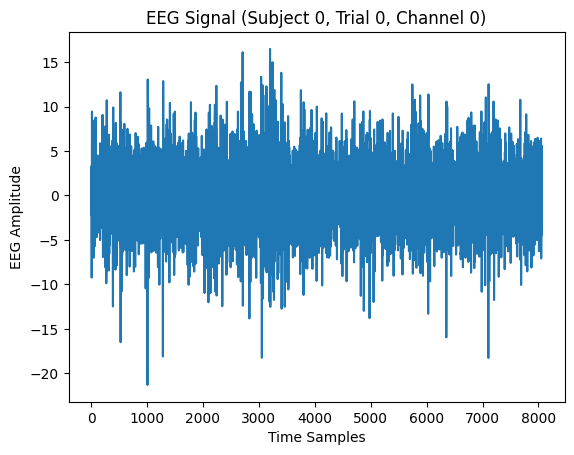

In [12]:
import matplotlib.pyplot as plt

subject, trial, channel = 0, 0, 0  # Change indices to inspect different signals
plt.plot(eeg_data[subject, trial, channel, :])
plt.xlabel("Time Samples")
plt.ylabel("EEG Amplitude")
plt.title(f"EEG Signal (Subject {subject}, Trial {trial}, Channel {channel})")
plt.show()


In [13]:
eeg_data = (eeg_data - np.mean(eeg_data)) / np.std(eeg_data)

print("After Normalization - EEG Min:", np.min(eeg_data), "EEG Max:", np.max(eeg_data))
print("EEG Mean:", np.mean(eeg_data))  # Should be close to 0
print("EEG Std:", np.std(eeg_data))    # Should be close to 1


After Normalization - EEG Min: -92.25708258667532 EEG Max: 137.90551968705392
EEG Mean: 2.589837515518949e-16
EEG Std: 1.0000000000000022


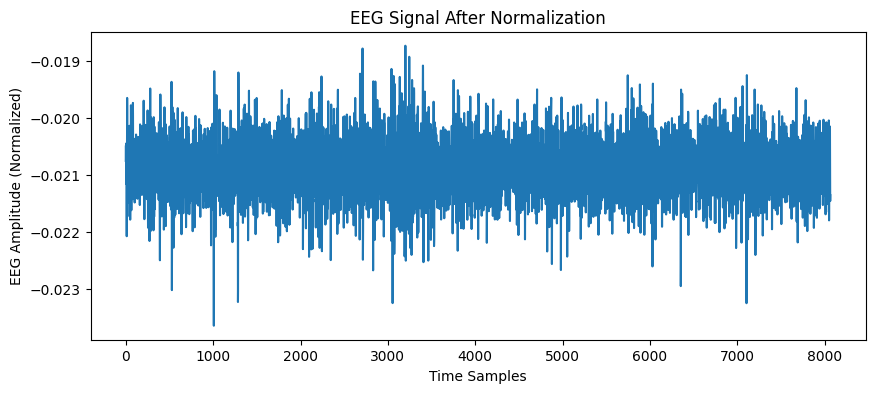

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(eeg_data[0, 0, 0, :])  # Subject 0, Trial 0, Channel 0
plt.xlabel("Time Samples")
plt.ylabel("EEG Amplitude (Normalized)")
plt.title("EEG Signal After Normalization")
plt.show()


In [15]:
for ch in range(eeg_data.shape[2]):  # Loop over EEG channels
    print(f"Channel {ch} - Min: {np.min(eeg_data[:, :, ch, :])}, Max: {np.max(eeg_data[:, :, ch, :])}")


Channel 0 - Min: -0.15385623143960594, Max: 0.10304943915802287
Channel 1 - Min: -0.28799829744348343, Max: 0.18365694593422044
Channel 2 - Min: -0.28688779047613133, Max: 0.1865629222651211
Channel 3 - Min: -0.3666235512735882, Max: 0.34927591434489325
Channel 4 - Min: -0.21480179516079576, Max: 0.1270636492402429
Channel 5 - Min: -0.14446660080947746, Max: 0.12369735872381493
Channel 6 - Min: -0.17684670750849904, Max: 0.1564069124012032
Channel 7 - Min: -0.12188578541818884, Max: 0.09070420545268958
Channel 8 - Min: -0.32178366417470394, Max: 0.23788463927745176
Channel 9 - Min: -0.11391986721080724, Max: 0.08692659913385586
Channel 10 - Min: -0.12485916376819514, Max: 0.10207716345265057
Channel 11 - Min: -0.14260215920527525, Max: 0.09447565573049037
Channel 12 - Min: -0.22132867785751856, Max: 0.1353736991213965
Channel 13 - Min: -0.2392420456438914, Max: 0.28018971373409174
Channel 14 - Min: -0.21196961792480865, Max: 0.14955536075161843
Channel 15 - Min: -0.1475061419920284, Ma

In [16]:
for ch in range(eeg_data.shape[2]):
    eeg_data[:, :, ch, :] = (eeg_data[:, :, ch, :] - np.mean(eeg_data[:, :, ch, :])) / np.std(eeg_data[:, :, ch, :])


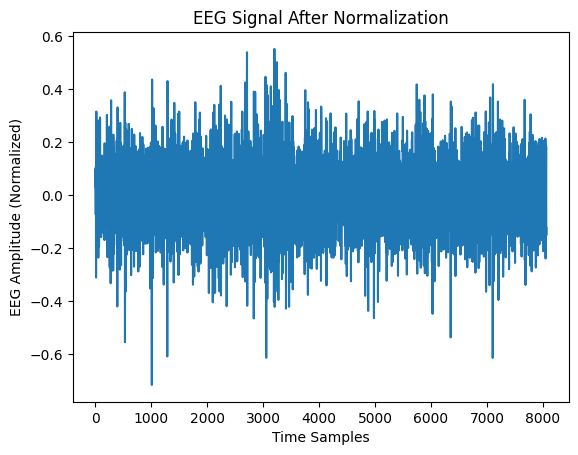

In [17]:
plt.plot(eeg_data[0, 0, 0, :])  # Subject 0, Trial 0, Channel 0
plt.xlabel("Time Samples")
plt.ylabel("EEG Amplitude (Normalized)")
plt.title("EEG Signal After Normalization")
plt.show()
